# 서포트 벡터 머신 

- 분류, 회귀, 이상치 탐지에 사용되는 지도학습 기반의 머신러닝 모델 
    - 복잡한 분류문제에 잘 들어맞으며 작거나 중간 크기의 데이터셋에 적합

- 서포트 벡터 머신은 마진이 최대화되는 결정 경계를 찾음

- 마진은 클래스를 구분하는 초평면(결정 경계)과 이 초평면에 가장 가까운 훈련 샘플 사이의 거리로 정의

- 초평면에 가장 가까운 훈련 샘플을 서포트 벡터라고 함

![](image/svm1.png)

- SVM은 특성의 스케일에 민감함
    - 표준화를 통해 스케일을 조정하면 결정 경계가 훨씬 좋아짐
    
![](image/svm2.png)

- 일반화 오차가 낮아지는 경향이 있기 때문에 큰 마진을 사용
    - 작은 마진의 경우 과대적합되기 쉬움

- H3의 경우 클래스를 제대로 분류하지 못하고 있음

- H1, H2의 경우 클래스를 제대로 분류하고 있음
    - H1의 경우 서포트 벡터에 가까워 새로운 샘플에 대해선 잘 동작하지 않을 수 있음
    - H2의 경우 서포트 벡터에서 멀리 떨어져있음
![](image/svm3.png)

- 모든 샘플이 마진 바깥쪽에 올바르게 분류되어 있다면 이를 하드 마진 분류라고 함

- 하드 마진 분류는 두가지의 문제점이 존재
    - 데이터가 선형적으로 구분될 수 있어야 제대로 동작
    - 이상치에 민감함

![](image/svm4.png)

- 소프트 마진 분류를 통해 마진 오류 사이에 적절한 균형이 필요
    - 하이퍼 파라미터인 C값을 조절
    - 과대적합이라면 C를 감소시켜 모델을 규제

![](image/svm5.png)


In [1]:
# 환경 설정
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split  
from sklearn.svm import SVC    # 분류 모델
from sklearn.svm import SVR     # 회귀 모델 

In [2]:
# 분류 데이터 가져오기
df = pd.read_csv('/mnt/elice/dataset/iris.csv')
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [3]:
# 컬럼별 결측치 조회
df.isna().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64

In [4]:
# 컬럼별 데이터 타입 조회
df.dtypes

sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width (cm)     float64
target                 int64
dtype: object

In [5]:
# 컬럼별 데이터 개수 및 타입 조회
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [6]:
df['target']

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: target, Length: 150, dtype: int64

In [7]:
# 데이터 분할하기
  # 시각화를 위해 특성은 2개만 사용 (petal length, petal width)
  # 범주가 Virginica 인지 아닌지 이진 분류로 변경(그냥 간단히 하려고)
X = df.loc[:, ['petal length (cm)', 'petal width (cm)']]
Y = df.loc[:, 'target'] == 2 # 그래서 2(Virginica)이면 True, 아니면 False로
X.head()

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


In [8]:
Y # 범주형 > 분류 모델 사용

0      False
1      False
2      False
3      False
4      False
       ...  
145     True
146     True
147     True
148     True
149     True
Name: target, Length: 150, dtype: bool

In [9]:
# SVM은 스케일에 민감 > 표준화 적용
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_Scaled = scaler.fit_transform(X)

In [10]:
# 학습용과 평가용으로 데이터 분할
x_train, x_test, y_train, y_test = train_test_split(X_Scaled, Y, random_state=0)

In [11]:
# 선형 SVM 모델 생성 및 학습
from sklearn.svm import LinearSVC
model = LinearSVC(C=1, loss='hinge', random_state=42)
model.fit(x_train, y_train)

LinearSVC(C=1, loss='hinge', random_state=42)

In [12]:
# 모델 평가
print('학습 데이터 성능 :', model.score(x_train, y_train))
print('평가 데이터 성능 :', model.score(x_test, y_test))

학습 데이터 성능 : 0.9553571428571429
평가 데이터 성능 : 0.9736842105263158


In [13]:
# 모델 예측
p_test = model.predict(x_test) # test 데이터에 대한 예측 수행
p_test

array([ True, False, False,  True, False,  True, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False,  True, False, False, False,  True, False, False,
       False, False, False,  True, False, False,  True,  True, False,
       False,  True])

In [14]:
# classification_report 계산
from sklearn.metrics import classification_report
print(classification_report(y_test, p_test))

              precision    recall  f1-score   support

       False       1.00      0.97      0.98        29
        True       0.90      1.00      0.95         9

    accuracy                           0.97        38
   macro avg       0.95      0.98      0.96        38
weighted avg       0.98      0.97      0.97        38



In [15]:
# SVC 모델 사용 (그냥 SVC 모델 써도 됨)
from sklearn.svm import SVC
model = SVC(C=1)
model.fit(x_train, y_train)

SVC(C=1)

In [16]:
# 모델 평가
print('학습 데이터 성능 :', model.score(x_train, y_train))
print('평가 데이터 성능 :', model.score(x_test, y_test))

학습 데이터 성능 : 0.9553571428571429
평가 데이터 성능 : 0.9736842105263158


In [17]:
# 모델 예측
p_test = model.predict(x_test) # test 데이터에 대한 예측 수행
p_test

array([ True, False, False,  True, False,  True, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False,  True, False, False, False,  True, False, False,
       False, False, False,  True, False, False,  True,  True, False,
       False,  True])

In [18]:
# classification_report 계산
from sklearn.metrics import classification_report
print(classification_report(y_test, p_test))

              precision    recall  f1-score   support

       False       1.00      0.97      0.98        29
        True       0.90      1.00      0.95         9

    accuracy                           0.97        38
   macro avg       0.95      0.98      0.96        38
weighted avg       0.98      0.97      0.97        38



- 선형적으로 분류할 수 없는 데이터셋의 경우 다항 특성과 같은 데이터셋을 추가
    - PolynoimalFeatures를 사용 가능

![](image/svm7.png)

- 커널 트릭을 사용하는 경우 비선형 분류가 가능
    - 실제로 특성을 추가하지 않으면서 다항식 특성을 많이 추가한 것과 같은 결과

![](image/svm8.png)

In [19]:
# 비선형 분류 데이터 가져오기
df = pd.read_csv('/mnt/elice/dataset/moon.csv')
df

,X1,X2,y
0,0.816805,0.521645,0
1,1.618596,-0.379829,1
2,-0.021270,0.273728,1
3,-1.021810,-0.075440,0
4,1.766546,-0.170699,1
...,...,...,...
195,-0.536334,0.860268,0
196,1.882817,0.244356,1
197,0.175752,-0.007231,1
198,0.124236,1.007902,0


In [20]:
# 데이터 분할
X = df.loc[:, df.columns != 'y']
Y = df.loc[:, 'y']
X.head()

,X1,X2
0,0.816805,0.521645
1,1.618596,-0.379829
2,-0.021270,0.273728
3,-1.021810,-0.075440
4,1.766546,-0.170699


In [21]:
# 범주 확인
Y.head()

0    0
1    1
2    1
3    0
4    1
Name: y, dtype: int64

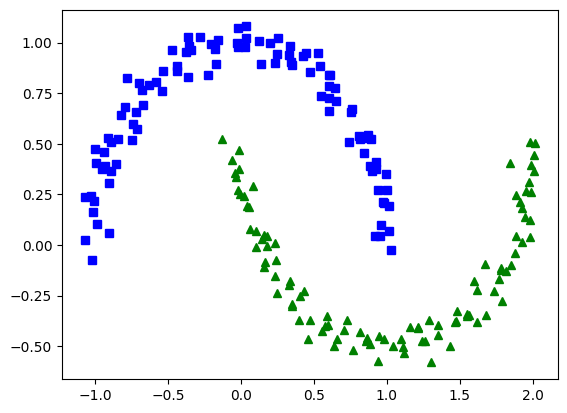

In [22]:
# 데이터 시각화
plt.plot(X.loc[Y==0, 'X1'], X.loc[Y==0, 'X2'], 'bs')
plt.plot(X.loc[Y==1, 'X1'], X.loc[Y==1, 'X2'], 'g^')

In [23]:
# 다항 변환 적용
from sklearn.preprocessing import PolynomialFeatures
P = PolynomialFeatures(degree=3)
X_Poly = P.fit_transform(X)

In [24]:
# 표준화 적용
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_Scaled = scaler.fit_transform(X_Poly)

In [25]:
# 모델 생성 및 학습
model = LinearSVC(C=10, loss='hinge')
model.fit(X_Scaled, Y)

/home/elicer/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC(C=10, loss='hinge')

/home/elicer/.local/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


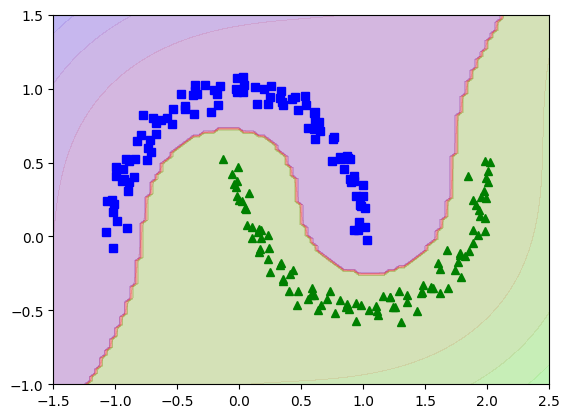

In [26]:
# 결과 시각화
def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    x = np.c_[x0.ravel(), x1.ravel()]
    x_poly = P.transform(x)
    x_scaled = scaler.transform(x_poly)
    y_pred = clf.predict(x_scaled).reshape(x0.shape)
    y_decision = clf.decision_function(x_scaled).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)
    
plot_predictions(model, [-1.5, 2.5, -1, 1.5])
plt.plot(X.loc[Y==0, 'X1'], X.loc[Y==0, 'X2'], 'bs')
plt.plot(X.loc[Y==1, 'X1'], X.loc[Y==1, 'X2'], 'g^')

In [27]:
# 데이터의 다항 변환은 컬럼의 개수가 늘어나기 때문에 문제가 발생할 수 있어서 커널 트릭 사용
# 다항식 커널 모델 사용
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_Scaled = scaler.fit_transform(X)

In [28]:
model = SVC(kernel='poly', degree=3, coef0=1, C=5)
model.fit(X_Scaled, Y)

SVC(C=5, coef0=1, kernel='poly')

/home/elicer/.local/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


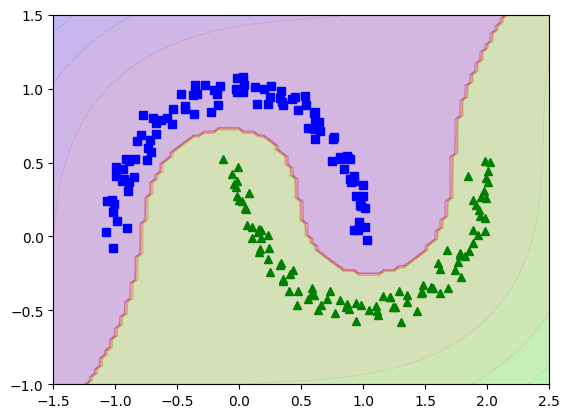

In [29]:
# 결과 시각화
def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    x = np.c_[x0.ravel(), x1.ravel()]
    x_scaled = scaler.transform(x)
    y_pred = clf.predict(x_scaled).reshape(x0.shape)
    y_decision = clf.decision_function(x_scaled).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)
    
plot_predictions(model, [-1.5, 2.5, -1, 1.5])
plt.plot(X.loc[Y==0, 'X1'], X.loc[Y==0, 'X2'], 'bs')
plt.plot(X.loc[Y==1, 'X1'], X.loc[Y==1, 'X2'], 'g^')

- SVM 회귀의 경우 제한된 마진 오류안에서 최대한 많은 샘플이 들어가도록 학습

- 마진의 크기는 하이퍼 파라미터 𝜀 으로 조절

- 마진 안에서는 훈련 샘플이 추가되어도 모델의 예측에는 영향이 없음

- 비선형 회귀의 경우 커널 SVM 모델을 사용

![](image/svm6.png)


In [30]:
# 회귀 데이터 가져오기
df = pd.read_csv('/mnt/elice/dataset/diabetes.csv')
df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930,220.0


In [31]:
# 컬럼별 데이터 개수 및 타입 조회
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
 10  target  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB


In [32]:
# 데이터 분할하기
X = df.iloc[:, :-1]
Y = df.iloc[:, -1]
X.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


In [33]:
Y # 연속형 > 회귀 모델 사용

0      151.0
1       75.0
2      141.0
3      206.0
4      135.0
       ...  
437    178.0
438    104.0
439    132.0
440    220.0
441     57.0
Name: target, Length: 442, dtype: float64

In [34]:
# 표준화 적용
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_Scaled = scaler.fit_transform(X)

In [35]:
# 학습용과 평가용으로 데이터 분할
x_train, x_test, y_train, y_test = train_test_split(X_Scaled, Y, random_state=0)

In [36]:
# 모델 생성
model = SVR(C=10) 

In [37]:
# 모델 학습
model.fit(x_train, y_train) # 학습용 데이터만 사용

SVR(C=10)

In [38]:
# 모델 평가 (R Squared)
print('학습 데이터 성능 :', model.score(x_train, y_train))
print('평가 데이터 성능 :', model.score(x_test, y_test))

학습 데이터 성능 : 0.5907650356298015
평가 데이터 성능 : 0.36342008018447747


In [39]:
# 모델 예측
p_test = model.predict(x_test) # test 데이터에 대한 예측 수행
p_test

array([249.49588651, 244.74971661, 154.73978649, 111.41649298,
       167.88969709, 234.96274603,  87.64661589, 211.4556182 ,
       146.83033327, 218.03855178, 167.01940078, 184.21501565,
       109.51112191, 116.56831791, 265.0850314 ,  74.64336649,
       142.82694438,  81.14770053, 134.57797387, 222.44733418,
       172.06502135, 131.76791597, 154.2527515 , 140.61328805,
       185.75954797, 150.29785287, 143.71352039,  83.86393387,
       171.50123251, 153.47357528, 190.3087927 ,  80.58766019,
       130.70702021, 166.19916104, 149.23394268, 194.71663785,
       165.09653232, 170.3014913 , 110.62396435, 208.55021496,
       102.15073962, 164.51851126, 135.77920303, 175.63889616,
       180.60885197,  93.19708587, 118.65416381, 118.78969515,
       110.11411772, 226.45865456, 139.6446485 ,  56.40798014,
       152.8530109 , 151.48276874, 232.74420781, 181.49785981,
       188.57341685, 109.34031447, 141.52923895, 183.44407613,
       198.42424451, 146.30969963, 152.4642506 ,  96.42

In [40]:
# rmse 계산
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, p_test, squared=False)

56.216065436816265

## 제출

제출을 위해 새로 불러온 `iris.csv` 데이터를 통해 SVM 분류 모델을 만들고 학습한 이후 학습 데이터의 score와 테스트 데이터의 score를 아래와 같은 dictionary로 만들어 `result`에 저장하세요.
- `{"train": 0.123, "test": 0.456}`
- 선형 SVM이 **아닌** SVM 모델을 의미합니다.
- SVM 분류 모델의 `C` 값은 1로 설정합니다.
- SVM 분류 모델을 생성할 때 반드시 `random_state=SEED`를 추가해야 합니다. 이를 추가하지 않으면 제대로 채점되지 않습니다.

In [41]:
df = pd.read_csv('/mnt/elice/dataset/iris.csv')
X = df.loc[:, ['petal length (cm)', 'petal width (cm)']]
Y = df.loc[:, 'target'] == 2

# SEED 값 바꾸면 제대로 채점되지 않을 수 있습니다.
SEED = 2023

scaler = StandardScaler()
X_Scaled = scaler.fit_transform(X)
x_train, x_test, y_train, y_test = train_test_split(X_Scaled, Y, random_state=SEED)

# TODO: SVM 모델을 학습하세요.
model = LinearSVC(C = 1, loss = 'hinge', random_state=42)
model.fit(x_train, y_train)

result = {
    "train": model.score(x_train, y_train),
    "test": model.score(x_test, y_test),
}

## 채점 수행

아래 코드는 채점 수행을 위한 코드입니다.

따라서 이를 수정했을시 **채점이 제대로 이루어지지 않습니다.**

**주의**: 채점 코드를 실행하기 전에 반드시 코드 파일을 한번 저장하시길 바랍니다.

In [42]:
import os
import json

assert isinstance(result, dict), \
    "'result' 변수에 요구사항에 맞는 dictionary가 저장되어 있는지 확인하세요."

with open('result.json', 'w') as f:
    json.dump(result, f)

os.system('elice_grade result.json cds_ai_exercise.ipynb')

send files ['result.json', 'cds_ai_exercise.ipynb'] for grade...
waiting result...
waiting result...
waiting result...
done!

Score: 100.000000
Duration: 2.342 seconds
=== Message ===
제출 완료되었습니다.


0